In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Import Data


In [15]:
fileName = 'loan_data.csv'
df = pd.read_csv(fileName)

df[df.notna().sum().sort_values().index].info()

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_45764\1849666050.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fileName)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    0 non-null       float64
 1   desc                         17 non-null      object 
 2   dti_joint                    34001 non-null   float64
 3   annual_inc_joint             34003 non-null   float64
 4   verification_status_joint    34003 non-null   object 
 5   mths_since_last_record       141179 non-null  float64
 6   mths_since_last_major_derog  215105 non-null  float64
 7   mths_since_last_delinq       396633 non-null  float64
 8   next_pymnt_d                 591423 non-null  object 
 9   il_util                      658743 non-null  float64
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  title                        736165 non-null  object 
 13 

In [16]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


### Target Output - Loan Status

In [17]:
df['loan_status'].value_counts()

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

In [18]:
df= df[df['loan_status'] != 'In Grace Period']                                                    # Remove loans in Grace Period
#df['loan_status'] = df['loan_status'].str.replace(pat='Late.*', regex=True, repl='Late')          # Late (15-30 days) ---> Late
df['loan_status'] = df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off') 

df['loan_status'].value_counts() 

loan_status
Current               565523
Fully Paid            130718
Charged Off            37233
Late (31-120 days)     15354
Late (16-30 days)       3876
Name: count, dtype: int64

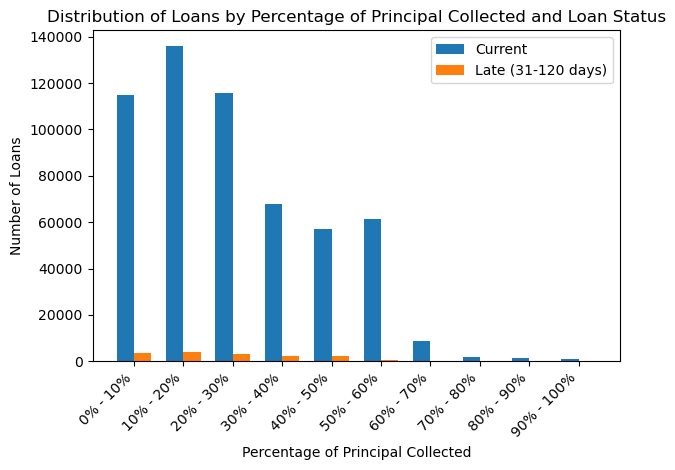

In [19]:
import matplotlib.pyplot as plt
import numpy as np


current_loans = df[df['loan_status'] == 'Current']
late_loans = df[df['loan_status'] == 'Late (31-120 days)']

# Combine both datasets into one DataFrame
combined_loans = pd.concat([current_loans, late_loans])

# Calculate the percentage of principal collected for each loan
combined_loans['principal_collected_percentage'] = (combined_loans['total_rec_prncp'] / combined_loans['funded_amnt']) * 100

# Define the percentage ranges
percentage_ranges = [(i, i+10) for i in range(0, 100, 10)]

# Initialize dictionaries to count the number of loans in each percentage range
current_loan_counts = {range_: 0 for range_ in percentage_ranges}
late_loan_counts = {range_: 0 for range_ in percentage_ranges}

# Count the number of loans in each percentage range for both loan statuses
for percentage, loan_status in zip(combined_loans['principal_collected_percentage'], combined_loans['loan_status']):
    for range_ in percentage_ranges:
        if range_[0] <= percentage < range_[1]:
            if loan_status == 'Current':
                current_loan_counts[range_] += 1
            elif loan_status == 'Late (31-120 days)':
                late_loan_counts[range_] += 1
            break  # Once the loan is counted in a range, move to the next loan

# Extract the range labels for plotting
labels = [f"{range_[0]}% - {range_[1]}%" for range_ in percentage_ranges]

# Extract the counts for plotting
current_counts = [current_loan_counts[range_] for range_ in percentage_ranges]
late_counts = [late_loan_counts[range_] for range_ in percentage_ranges]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, current_counts, width=bar_width, label='Current')
plt.bar(x + bar_width/2, late_counts, width=bar_width, label='Late (31-120 days)')
plt.xlabel('Percentage of Principal Collected')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Percentage of Principal Collected and Loan Status')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# Calculate the percentage of principal collected for each loan
df['principal_collected_percentage'] = (df['total_rec_prncp'] / df['funded_amnt']) * 100

# Update the loan status based on the percentage of principal collected
df.loc[(df['loan_status'] == 'Current') & (df['principal_collected_percentage'] > 60), 'loan_status'] = 'Fully Paid'
df.loc[(df['loan_status'] == 'Late (31-120 days)') & (df['principal_collected_percentage'] < 30), 'loan_status'] = 'Charged Off'

df['loan_status'].value_counts() 

loan_status
Current               552507
Fully Paid            143734
Charged Off            47781
Late (31-120 days)      4806
Late (16-30 days)       3876
Name: count, dtype: int64

In [21]:
df_modified = df[~df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Current'])]
df_modified['loan_status'].value_counts() 

loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64

### Remove empty columns and correlated columns

In [22]:
df_modified = df_modified.drop(columns=['member_id', 'desc'])
df_numerical_features = df_modified.select_dtypes(include=['number', 'int', 'float'])
df_numerical_features.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,principal_collected_percentage
8,112038251,11575,11575,11575.0,7.35,359.26,153000.0,16.99,0,0.0,24.0,84.0,20,1,8550.0,22.7,46,0.0,0.0,11707.816236,11707.82,11575.0,132.82,0.0,0.0,0.0,11360.38,0,24.0,1,NaN,NaN,0,0.0,442731.0,1.0,0.0,0.0,27.0,92315.0,63.0,2.0,8.0,1581.0,36.0,37600.0,1.0,6.0,2.0,100.0
10,112149045,7200,7200,7200.0,24.85,285.70,50000.0,6.07,0,0.0,72.0,NaN,4,0,3560.0,98.9,5,0.0,0.0,7206.461000,7206.46,7200.0,6.46,0.0,0.0,0.0,7231.31,0,72.0,1,NaN,NaN,0,0.0,5588.0,0.0,0.0,1.0,21.0,2028.0,51.0,0.0,1.0,2779.0,74.0,3600.0,0.0,0.0,0.0,100.0
24,112052261,7500,7500,7500.0,7.35,232.79,110000.0,13.12,0,2.0,NaN,NaN,19,0,23348.0,27.2,27,0.0,0.0,7642.289180,7642.29,7500.0,142.29,0.0,0.0,0.0,7184.37,0,NaN,1,NaN,NaN,0,0.0,276461.0,1.0,1.0,5.0,7.0,22607.0,70.0,1.0,6.0,5965.0,39.0,85700.0,6.0,8.0,6.0,100.0
42,111999259,10000,10000,10000.0,16.02,243.29,51979.0,10.11,0,0.0,NaN,55.0,15,2,5733.0,20.0,21,0.0,0.0,10026.700000,10026.70,10000.0,26.70,0.0,0.0,0.0,10048.95,0,NaN,1,NaN,NaN,0,251.0,10956.0,1.0,1.0,2.0,9.0,5223.0,95.0,2.0,5.0,3898.0,32.0,28700.0,0.0,0.0,0.0,100.0
91,111808508,14000,14000,14000.0,16.02,492.34,75000.0,10.86,1,0.0,17.0,NaN,4,0,2700.0,90.0,10,0.0,0.0,14375.136851,14375.14,14000.0,375.14,0.0,0.0,0.0,13913.95,0,NaN,1,NaN,NaN,0,0.0,127645.0,1.0,1.0,2.0,7.0,24984.0,82.0,2.0,3.0,2700.0,83.0,3000.0,3.0,0.0,4.0,100.0


#### Numerical features

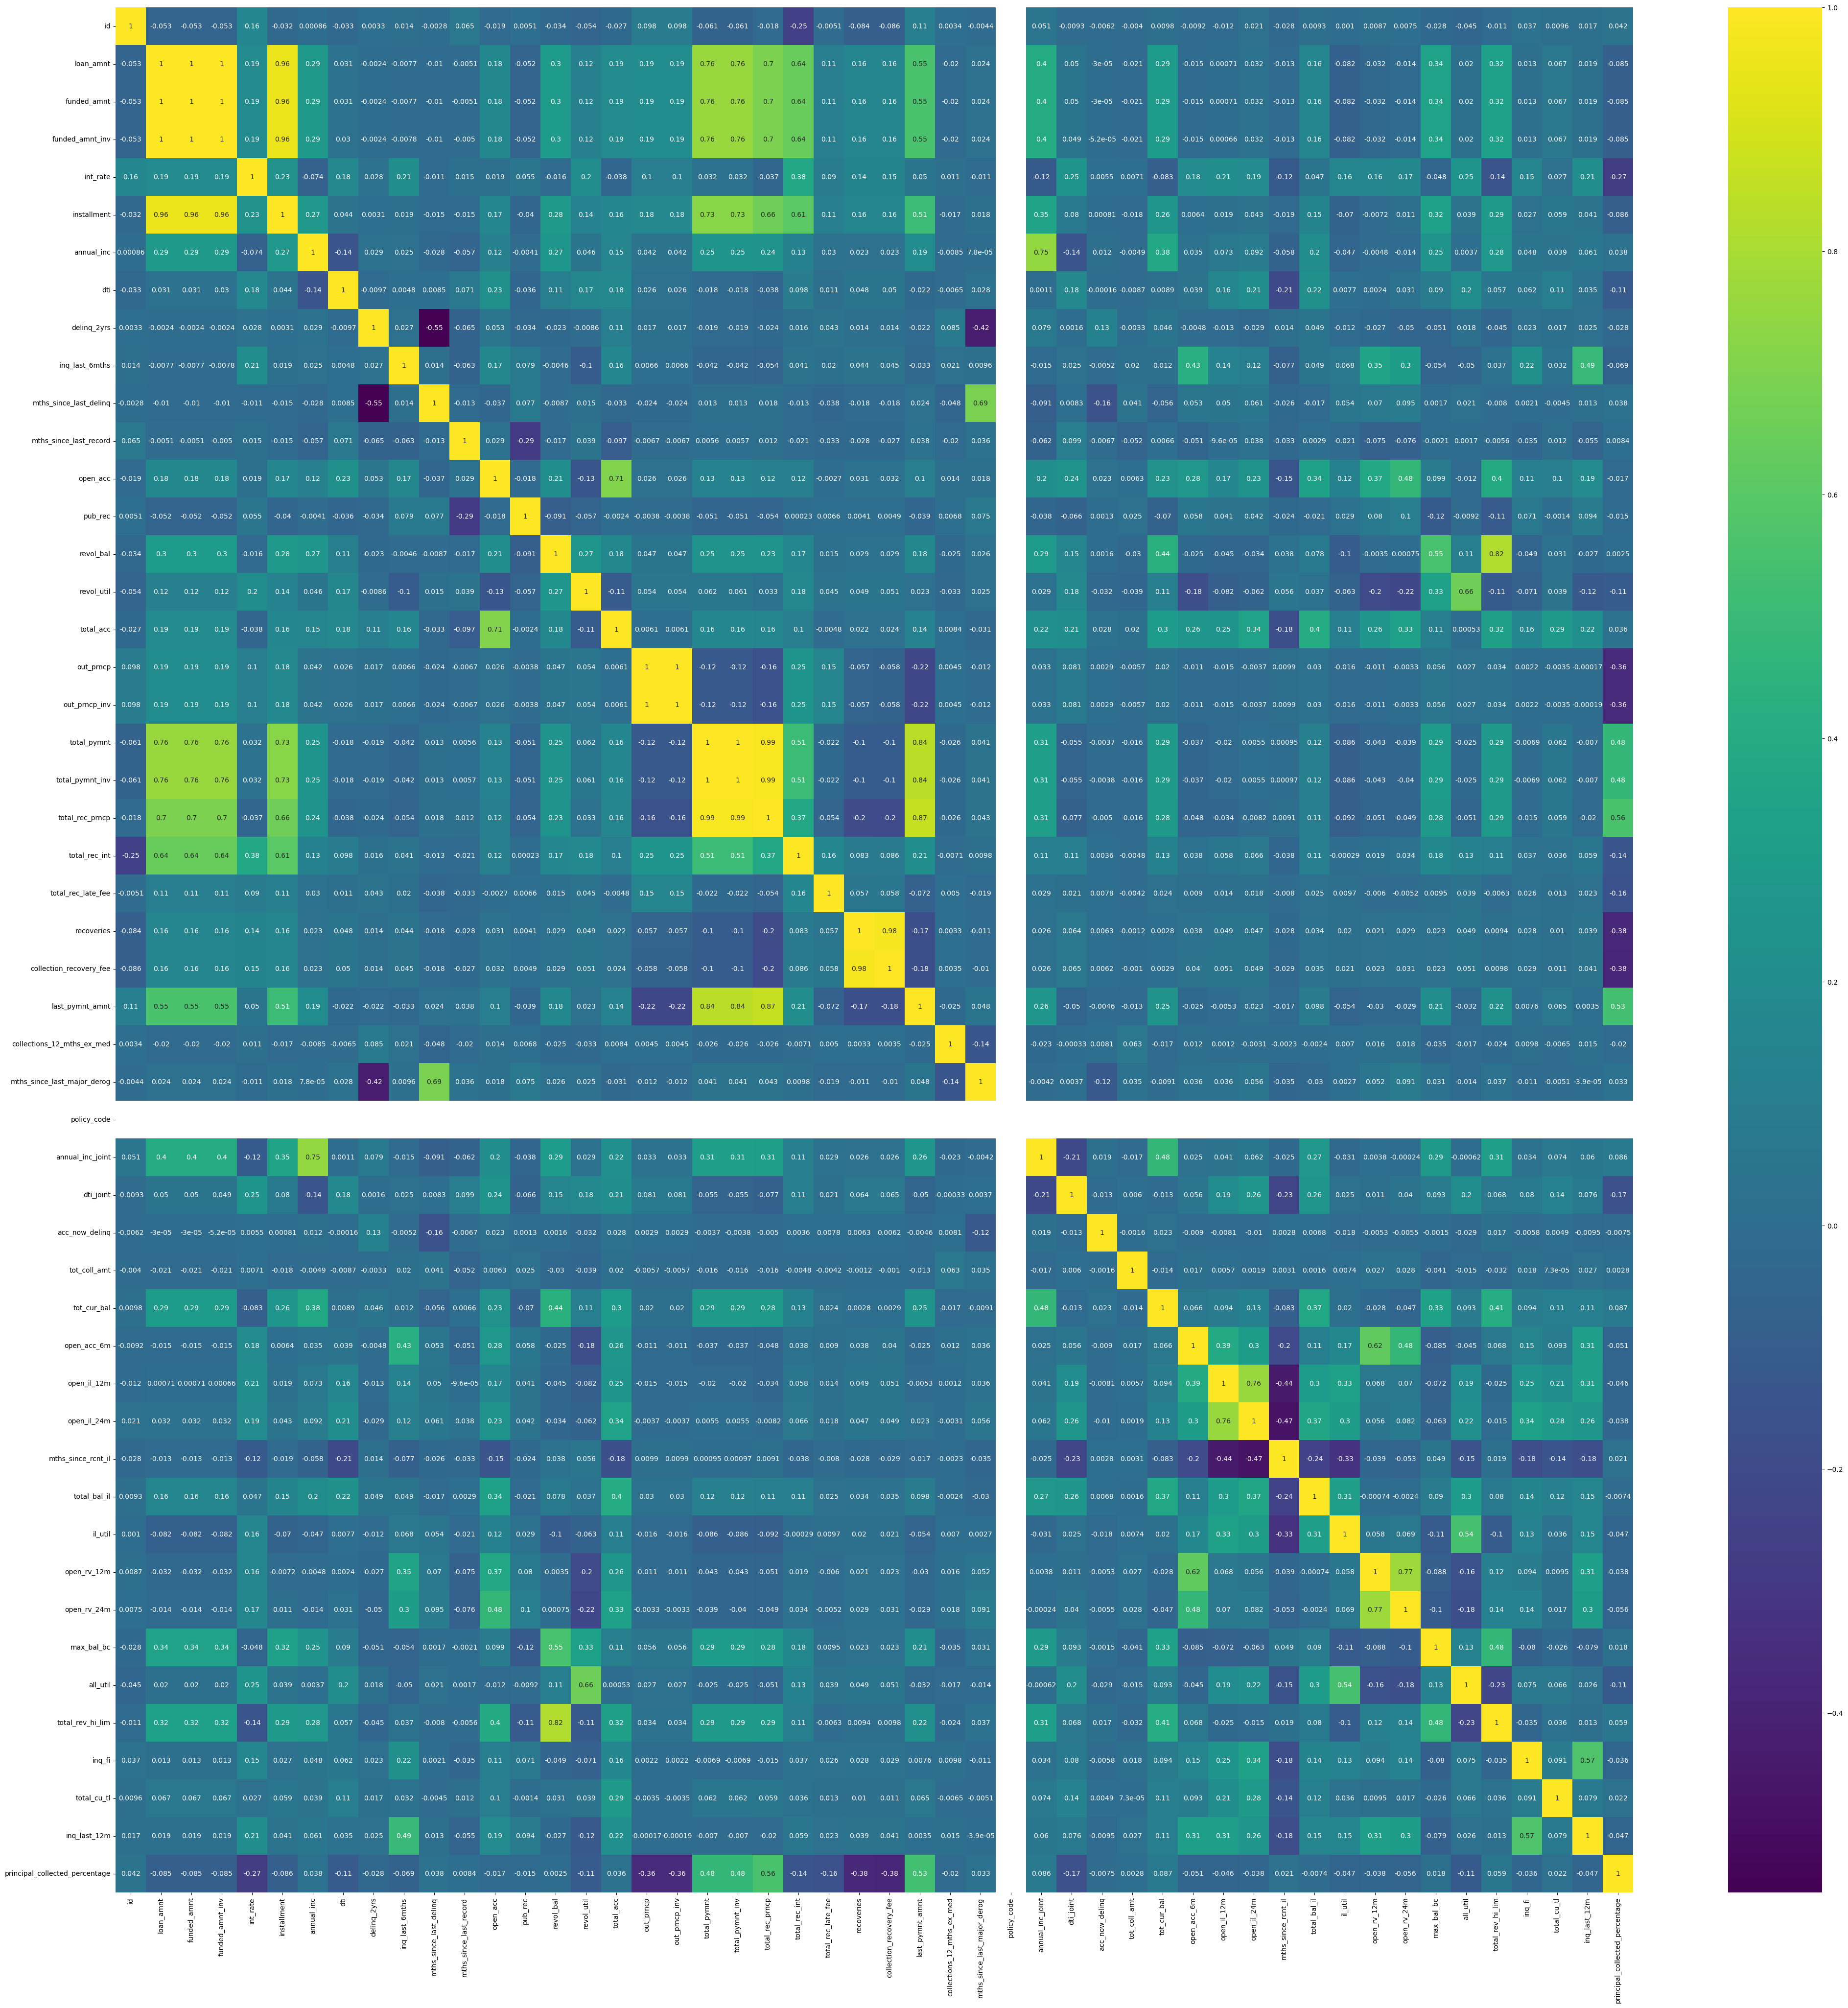

In [23]:
plt.figure(figsize=(50, 50));
sns.heatmap(df_numerical_features.corr(), annot=True, cmap='viridis');

In [31]:
df_modified['policy_code'].describe()

count    191515.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: policy_code, dtype: float64

In [37]:
df_modified.drop(columns=['policy_code', 
                          'funded_amnt',
                          'funded_amnt_inv', 
                          'installment',
                          'total_pymnt_inv',
                          'total_rec_prncp',
                          'collection_recovery_fee']);

df_modified.describe(include='all')

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,principal_collected_percentage
count,1.915150e+05,191515.000000,191515.000000,191515.000000,191515,191515.000000,191515.000000,191515,191515,179168,179277,191515,1.915150e+05,191515,191515,191515,191515,191515,182597,191515,191515,191475.000000,191515.00000,191515,191514.000000,100142.000000,38842.000000,191515.000000,191515.000000,1.915150e+05,191381.000000,191515.000000,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,190567,191515.000000,23600,191513,191515.000000,55631.000000,191515.0,191515,4.227000e+03,4227.000000,4227,191515.000000,191515.000000,1.915150e+05,191472.000000,191473.000000,191473.000000,186982.000000,1.914730e+05,166854.000000,191473.000000,191473.000000,191473.000000,191459.000000,1.915150e+05,191473.000000,191472.000000,191472.000000,191515.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,58344,11,5,NaN,3,21,2,2,12,12,895,50,NaN,NaN,659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,3,25,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,36 months,NaN,NaN,C,C1,Manager,10+ years,MORTGAGE,NaN,Source Verified,Mar-2016,Fully Paid,n,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Sep-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec-2017,NaN,Jan-2018,Dec-2017,NaN,NaN,NaN,Individual,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,146106,NaN,NaN,56959,12914,3641,65182,95330,NaN,77231,24415,143734,191218,109785,104264,2237,28017,NaN,NaN,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19081,NaN,23585,86654,NaN,NaN,NaN,187288,NaN,NaN,3442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.486023e+07,14604.011174,14604.011174,14598.267188,NaN,13.787241,450.622469,NaN,NaN,NaN,NaN,NaN,7.984813e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.566909,0.34201,NaN,0.635572,34.314144,68.855826,11.931541,0.261656,1.612410e+04,47.740032,25.423622,NaN,1064.939210,1064.585865,12434.565498,12429.780432,10931.569203,1351.423787,1.292128,150.280373,26.772666,NaN,7686.105668,NaN,NaN,0.021236,45.559544,1.0,NaN,1.122096e+05,18.455997,NaN,0.006334,263.479362,1.483681e+05,1.117328,0.843419,1.849331,18.786006,3.643989e+04,72.599159,1.493615,3.146945,5578.036501,59.073943,3.447054e+04,1.120179,1.705795,2.452907,76.797064
std,1.286874e+07,9114.805202,9114.805202,9111.965324,NaN,5.470286,282.461283,NaN,NaN,NaN,NaN,NaN,7.632500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.188874,0.92968,NaN,0.918926,22.091573,24.363911,5.749732,0.653623,2.362275e+04,24.735198,12.319893,NaN,3948.994186,3947.535300,9837.982116,9834.976957,9298.013275,1460.226132,8.331000,708.622148,124.611763,NaN,8587.586784,NaN,NaN,0.164154,22.427098,0.0,NaN,5.359343e+04,7.379407,NaN,0.083813,1983.526741,1.629015e+05,1.257261,1.044951,1.762987,24.244758,4.230923e+04,22.363027,1.617289,2.767610,5588.641039,20.724882,3.522036e+04,1.632743,2.931404,2.632314,3

##### Handling Null values

In [35]:
null_columns = df_modified.columns[df_modified.isnull().any()]
df_modified[null_columns].describe()

,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_util,mths_since_last_major_derog,annual_inc_joint,dti_joint,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
count,191475.000000,191514.000000,100142.000000,38842.000000,191381.000000,55631.000000,4.227000e+03,4227.000000,191472.000000,191473.000000,191473.000000,186982.000000,1.914730e+05,166854.000000,191473.000000,191473.000000,191473.000000,191459.000000,191473.000000,191472.000000,191472.000000
mean,18.566909,0.635572,34.314144,68.855826,47.740032,45.559544,1.122096e+05,18.455997,1.117328,0.843419,1.849331,18.786006,3.643989e+04,72.599159,1.493615,3.146945,5578.036501,59.073943,1.120179,1.705795,2.452907
std,11.188874,0.918926,22.091573,24.363911,24.735198,22.427098,5.359343e+04,7.379407,1.257261,1.044951,1.762987,24.244758,4.230923e+04,22.363027,1.617289,2.767610,5588.641039,20.724882,1.632743,2.931404,2.632314
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.807200e+04,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.900000,0.000000,16.000000,54.000000,28.800000,28.000000,7.900000e+04,13.210000,0.000000,0.000000,1.000000,6.000000,1.039100e+04,60.000000,0.000000,1.000000,2212.000000,46.000000,0.000000,0.000000,1.000000
50%,17.890000,0.000000,31.000000,71.000000,47.000000,45.000000,1.030000e+05,18.070000,1.000000,1.000000,1.000000,11.000000,2.491500e+04,76.000000,1.000000,3.000000,4231.000000,61.000000,1.000000,0.000000,2.000000
75%,24.600000,1.000000,50.000000,86.000000,66.300000,64.000000,1.332000e+05,23.350000,2.000000,1.000000,3.000000,21.000000,4.758900e+04,88.000000,2.000000,4.000000,7239.000000,74.000000,2.000000,2.000000,3.000000
max,999.000000,5.000000,192.000000,120.000000,172.000000,197.000000,1.210000e+06,63.660000,18.000000,25.000000,51.000000,415.000000,1.547285e+06,558.000000,28.000000,45.000000,776843.000000,198.000000,28.000000,79.000000,40.000000


##### Handling Correlated features

In [27]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr


corr_features = correlation(df_numerical_features, 0.7)
corr_features

{'annual_inc_joint',
 'collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'last_pymnt_amnt',
 'open_il_24m',
 'open_rv_24m',
 'out_prncp_inv',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [28]:
df_numerical_features.drop(columns=['policy_code']);
df_numerical_features.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,principal_collected_percentage
count,1.915150e+05,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,1.915150e+05,191475.000000,191515.00000,191514.000000,100142.000000,38842.000000,191515.000000,191515.000000,1.915150e+05,191381.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,55631.000000,191515.0,4.227000e+03,4227.000000,191515.000000,191515.000000,1.915150e+05,191472.000000,191473.000000,191473.000000,186982.000000,1.914730e+05,166854.000000,191473.000000,191473.000000,191473.000000,191459.000000,1.915150e+05,191473.000000,191472.000000,191472.000000,191515.000000
mean,8.486023e+07,14604.011174,14604.011174,14598.267188,13.787241,450.622469,7.984813e+04,18.566909,0.34201,0.635572,34.314144,68.855826,11.931541,0.261656,1.612410e+04,47.740032,25.423622,1064.939210,1064.585865,12434.565498,12429.780432,10931.569203,1351.423787,1.292128,150.280373,26.772666,7686.105668,0.021236,45.559544,1.0,1.122096e+05,18.455997,0.006334,263.479362,1.483681e+05,1.117328,0.843419,1.849331,18.786006,3.643989e+04,72.599159,1.493615,3.146945,5578.036501,59.073943,3.447054e+04,1.120179,1.705795,2.452907,76.797064
std,1.286874e+07,9114.805202,9114.805202,9111.965324,5.470286,282.461283,7.632500e+04,11.188874,0.92968,0.918926,22.091573,24.363911,5.749732,0.653623,2.362275e+04,24.735198,12.319893,3948.994186,3947.535300,9837.982116,9834.976957,9298.013275,1460.226132,8.331000,708.622148,124.611763,8587.586784,0.164154,22.427098,0.0,5.359343e+04,7.379407,0.083813,1983.526741,1.629015e+05,1.257261,1.044951,1.762987,24.244758,4.230923e+04,22.363027,1.617289,2.767610,5588.641039,20.724882,3.522036e+04,1.632743,2.931404,2.632314,36.723835
min,6.510400e+04,1000.000000,1000.000000,775.000000,5.320000,30.120000,0.000000e+00,-1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.807200e+04,0.320000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.449201e+07,7500.000000,7500.000000,7500.000000,9.750000,242.570000,4.900000e+04,11.900000,0.00000,0.000000,16.000000,54.000000,8.000000,0.000000,5.519500e+03,28.800000,17.000000,0.000000,0.000000,4961.010000,4957.680000,3350.000000,376.310000,0.000000,0.000000,0.000000,546.335000,0.000000,28.000000,1.0,7.900000e+04,13.210000,0.000000,0.000000,3.195800e+04,0.000000,0.000000,1.000000,6.000000,1.039100e+04,60.000000,0.000000,1.000000,2212.000000,46.000000,1.470000e+04,0.000000,0.000000,1.000000,60.127357
50%,8.391064e+07,12000.000000,12000.000000,12000.000000,12.880000,377.770000,6.800000e+04,17.890000,0.00000,0.000000,31.000000,71.000000,11.000000,0.000000,1.058800e+04,47.000000,24.000000,0.000000,0.000000,9935.580000,9927.240000,8400.000000,878.360000,0.000000,0.000000,0.000000,4821.850000,0.000000,45.000000,1.0,1.030000e+05,18.070000,0.000000,0.000000,8.873700e+04,1.000000,1.000000,1.000000,11.000000,2.491500e+04,76.000000,1.000000,3.000000,4231.000000,61.000000,2.530000e+04,1.000000,0.000000,2.000000,100.000000
75%,9.361337e+07,20000.000000,20000.000000